In [1]:
import sys
sys.path.append("/Users/david/Documents/code/fhmm/v1")

In [2]:
import src.ads_davidjames9610.ads as ads
import src.ads_davidjames9610.useful as useful
import numpy as np
import os
import os.path
from pathlib import Path
import matplotlib.pyplot as plt
from importlib import reload
from src.classifiers_davidjames9610.test_a.e_config import *
import src.misc_davidjames9610.fe_methods as fe
import src.misc_davidjames9610.proc_methods as pm
from hmmlearn.hmm import GaussianHMM, GMMHMM, BaseHMM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
import pickle
sls = pickle.load(open('samples_labels.pickle','rb'))
features = pickle.load(open('features.pickle','rb'))
classifiers = pickle.load(open('classifiers.pickle','rb'))

In [4]:
CLASSIFICATION = 'classification'
REGRESSION = 'regression'

eval_type = CLASSIFICATION

testing for feature type:  lp


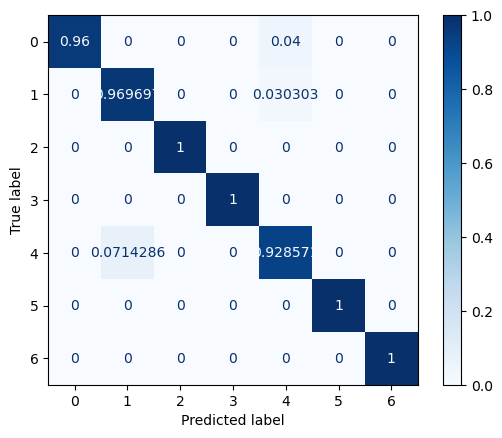

testing for feature type:  mfcc


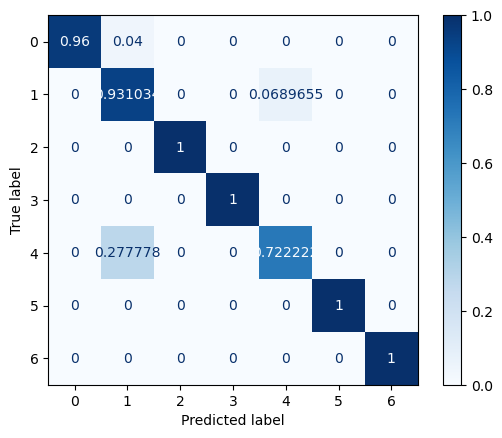

In [8]:
results = {} # one for feature

# CLASSIFICATION
for feature_key in features:

    print('testing for feature type: ', feature_key)

    curr_features = features[feature_key]['test_features']
    curr_label = features[feature_key]['test_label']
    curr_classifiers = classifiers[feature_key]
    test_labels = []

    for feat in curr_features:
        speakers_scores = []
        for speaker in sls['labels_set']:
            speaker_hmm: BaseHMM = curr_classifiers[speaker]
            speakers_scores.append(speaker_hmm.score(feat))
        arg_max_speaker = np.argmax(speakers_scores)
        test_labels.append(arg_max_speaker)

    cm = confusion_matrix(np.array(test_labels), curr_label, labels=list(sls['num_to_label'].keys()), normalize='true')

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(sls['num_to_label'].keys()))
    disp.plot(cmap=plt.cm.Blues, values_format='g')
    plt.show()
